Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 KB 1.6 MB/s eta 0:00:001.6 MB/s eta 0:00:01
      country almond angelica anise anise_seed apple apple_brandy apricot  \
0  Vietnamese     No       No    No         No    No           No      No   
1  Vietnamese     No       No    No         No    No           No      No   
2  Vietnamese     No       No    No         No    No           No      No   
3  Vietnamese     No       No    No         No    No           No      No   
4  Vietnamese     No       No    No         No    No           No      No   

  armagnac artemisia  ... whiskey white_bread white_wine  \
0       No        No  ...      No          No         No   
1       No        No  ...      No          No         No   
2       No        No  ...      No          No         No   
3       No        No  ...      No          No         No   
4       No        No  ...      No          No         No  

/tmp/ipykernel_1109345/723385792.py:20: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  binary_data = ingredient_data.replace({'Yes': 1, 'No': 0})


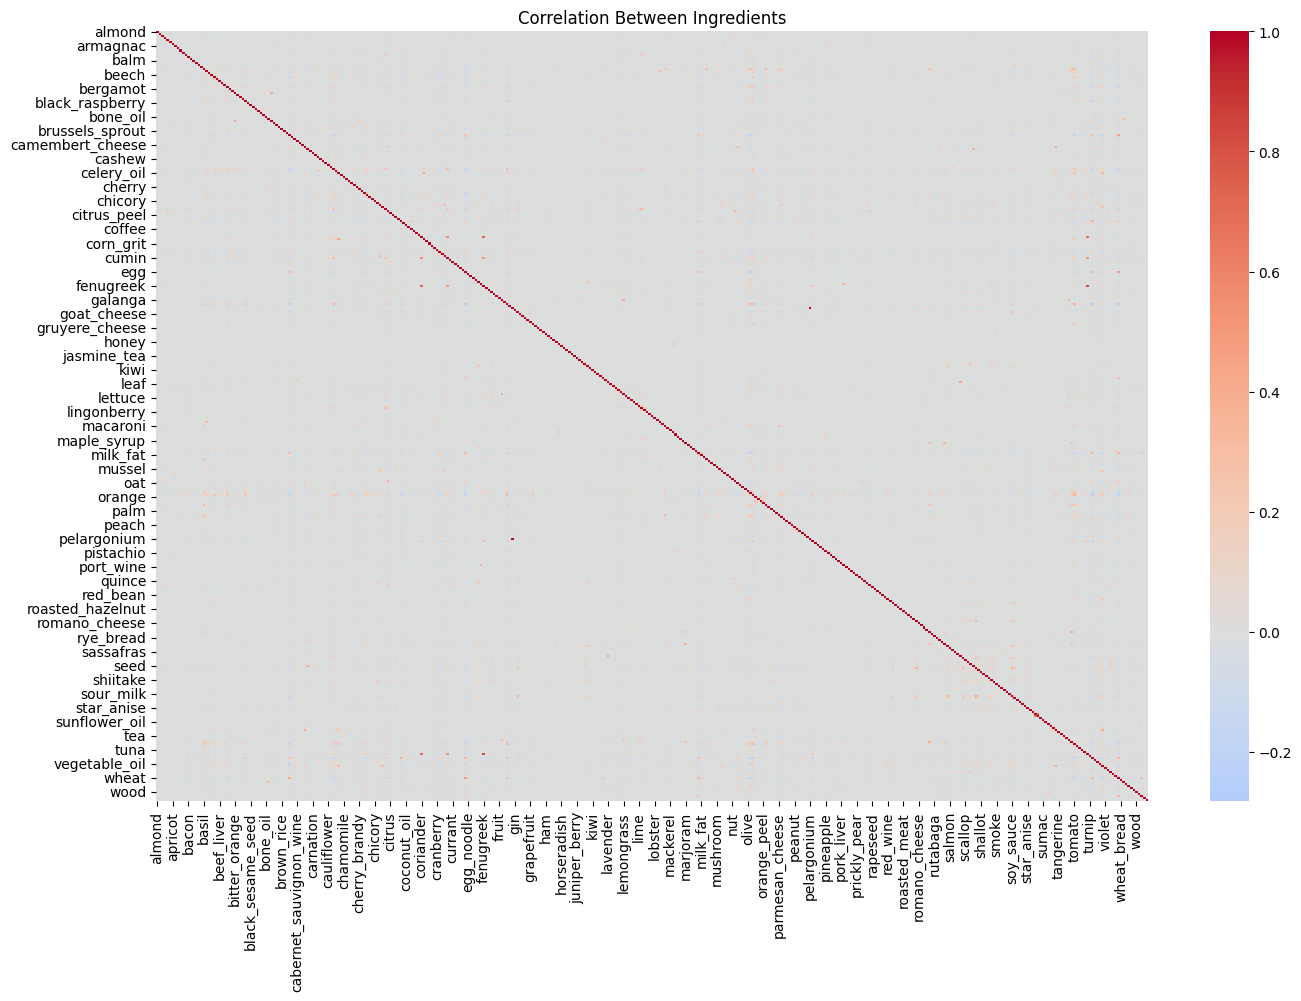

In [19]:
import pandas as pd
import matplotlib.pyplot as plt  # Import matplotlib.pyplot as plt
import seaborn as sns  # Import seaborn for the heatmap

# Load the data
data = pd.read_csv('recipes.csv')

# Display the first 5 rows of the DataFrame
print(data.head())

# Get a summary of the DataFrame
print(data.info())

# Drop the 'country' column since we're interested in ingredients only
ingredient_data = data.drop(columns=['country'])

# Convert 'Yes'/'No' to binary (1/0) for correlation analysis
binary_data = ingredient_data.replace({'Yes': 1, 'No': 0})

# Compute the correlation matrix
correlation_matrix = binary_data.corr()

# Plot a heatmap of the correlation matrix
plt.figure(figsize=(16, 10))  # Set the size of the figure
sns.heatmap(correlation_matrix, cmap='coolwarm', center=0)  # Create the heatmap
plt.title('Correlation Between Ingredients')  # Set the title of the plot
plt.show()  # Display the plot


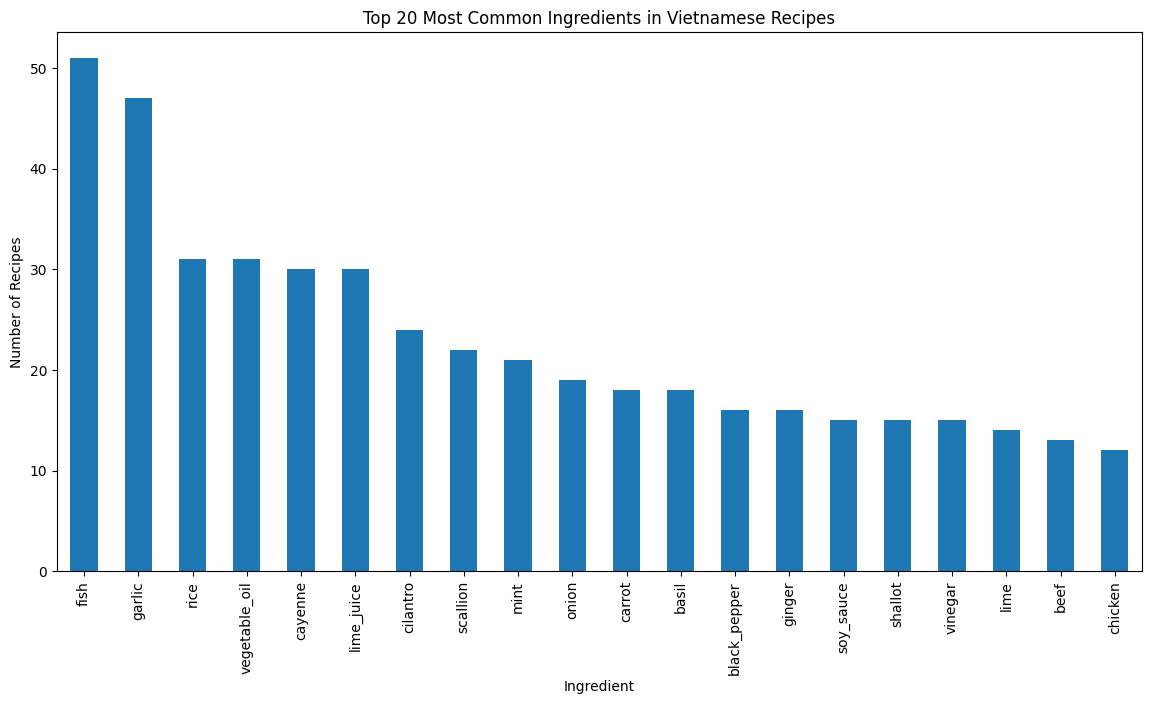

In [20]:
# Specify the country of interest
country_of_interest = 'Vietnamese'

# Filter the data for that country
country_data = data[data['country'] == country_of_interest].drop(columns=['country'])

# Calculate the frequency of 'Yes' for each ingredient within that country
country_ingredient_frequency = (country_data == 'Yes').sum()

# Plot the top 20 most common ingredients in that country
country_ingredient_frequency.sort_values(ascending=False).head(20).plot(kind='bar', figsize=(14, 7))
plt.title(f'Top 20 Most Common Ingredients in {country_of_interest} Recipes')
plt.xlabel('Ingredient')
plt.ylabel('Number of Recipes')
plt.show()


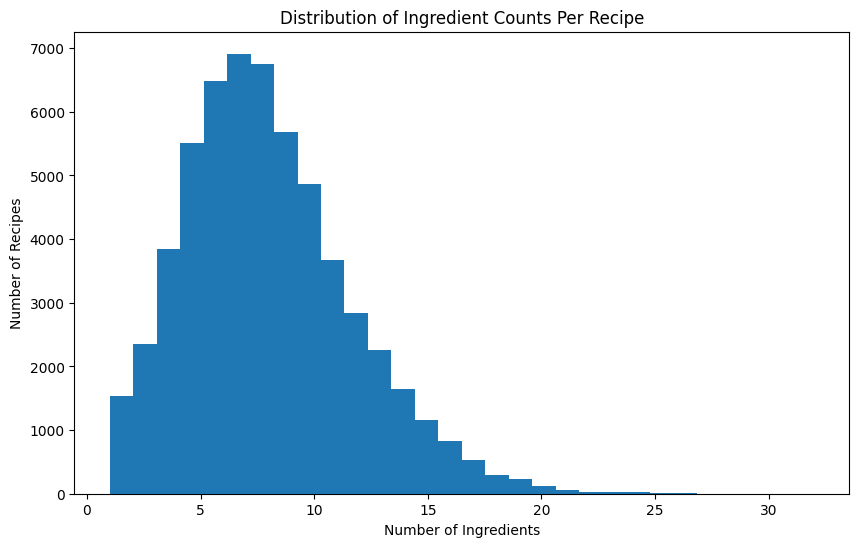

In [21]:
# Calculate the number of ingredients per recipe
ingredient_counts = (ingredient_data == 'Yes').sum(axis=1)

# Plot the distribution
plt.figure(figsize=(10, 6))
ingredient_counts.plot(kind='hist', bins=30)
plt.title('Distribution of Ingredient Counts Per Recipe')
plt.xlabel('Number of Ingredients')
plt.ylabel('Number of Recipes')
plt.show()

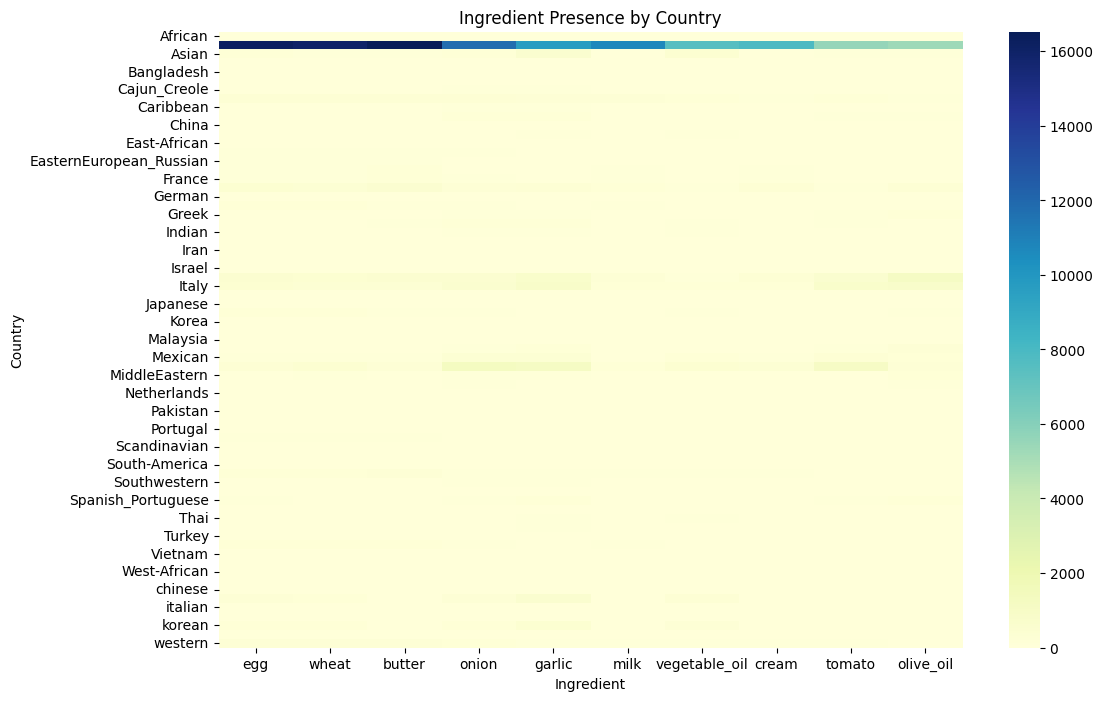

In [22]:
import seaborn as sns

# Group by country and sum the 'Yes' counts for each ingredient
country_ingredient_frequency = (data.drop(columns=['country']) == 'Yes').groupby(data['country']).sum()

# Select the top 10 ingredients for the heatmap
top_ingredients = ingredient_frequency.sort_values(ascending=False).head(10).index
heatmap_data = country_ingredient_frequency[top_ingredients]

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=False)
plt.title('Ingredient Presence by Country')
plt.xlabel('Ingredient')
plt.ylabel('Country')
plt.show()


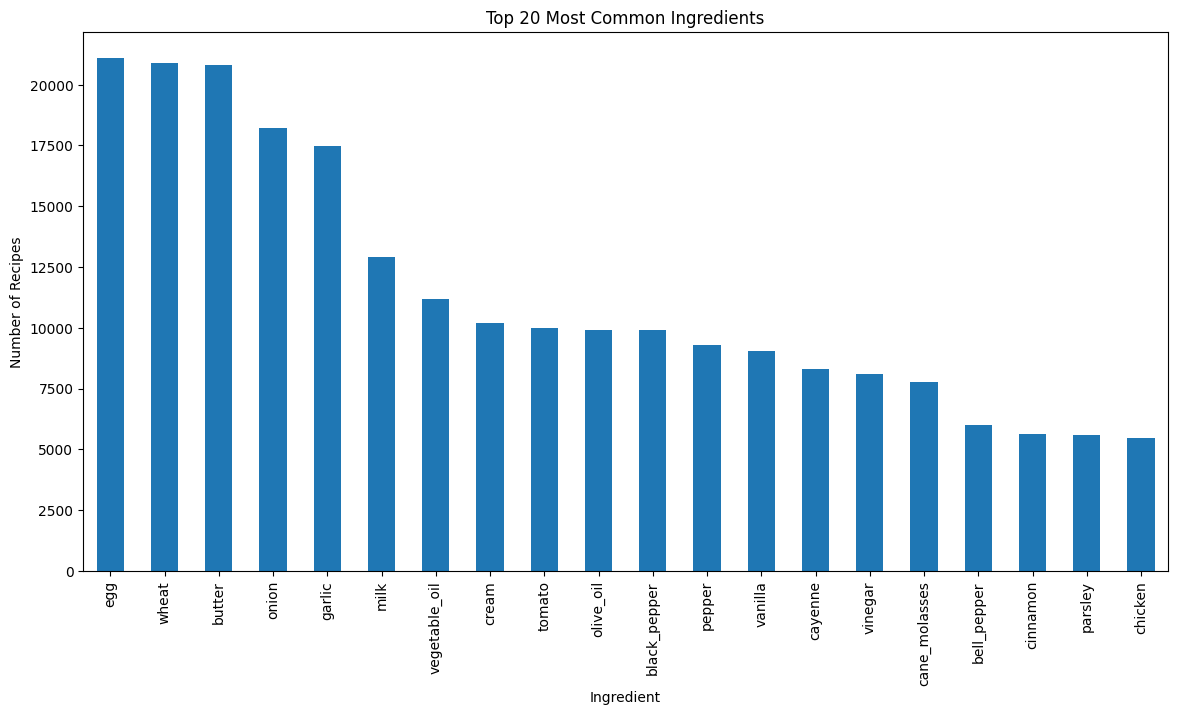

In [23]:
# Drop the 'country' column since we're interested in ingredients
ingredient_data = data.drop(columns=['country'])

# Calculate the frequency of 'Yes' for each ingredient
ingredient_frequency = (ingredient_data == 'Yes').sum()

# Plot the top 20 most common ingredients
ingredient_frequency.sort_values(ascending=False).head(20).plot(kind='bar', figsize=(14, 7))
plt.title('Top 20 Most Common Ingredients')
plt.xlabel('Ingredient')
plt.ylabel('Number of Recipes')
plt.show()